# NASA GES DISC Precipitation

In [1]:
# Dependencies
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colormaps as cmaps
from matplotlib.colors import ListedColormap as lcmap
from matplotlib.colors import Normalize as norm
from matplotlib.colors import LogNorm as logn
import matplotlib.animation as animation
import fns as f

In [2]:
ca_shape = gpd.read_file('../outputs/shapes/ca_shape.geojson')
ca_bbox = gpd.read_file('../outputs/shapes/ca_bbox.geojson')
ca_grid = gpd.read_file('../outputs/shapes/ca_grid.geojson')

In [3]:
# Get dates to pull fire data
dt = [f'{str(x.date())[0:7]}' for x in pd.date_range("2013-01-01", "2024-02-29", freq="ME")]

In [4]:
ca_fire_grid = gpd.read_file('../outputs/nasa-firms/geojson/ca_fire_GES_grids.geojson')

In [5]:
rain_gdf_dict = {}
for d in dt:
    df = pd.read_csv(f'../outputs/nasa-gesdisc/{d}.csv').set_index('lon')
    rain = []
    for i in ca_grid.index:
        x = round(ca_grid.loc[i,'geometry'].centroid.x,2)
        y = round(ca_grid.loc[i,'geometry'].centroid.y,2)
        rain.append(df.loc[x,str(y)])
    rain_gdf_dict[d] = gpd.GeoDataFrame({'rain':rain},geometry=ca_grid.geometry,crs=4326)

In [6]:
rain_gdf_dict[d]

,rain,geometry
0,354.849430,"POLYGON ((-124.40000 40.20000, -124.40000 40.3..."
1,331.331970,"POLYGON ((-124.40000 40.30000, -124.40000 40.4..."
2,335.432250,"POLYGON ((-124.40000 40.40000, -124.40000 40.5..."
3,259.690670,"POLYGON ((-124.40000 40.50000, -124.40000 40.6..."
4,265.494300,"POLYGON ((-124.40000 40.60000, -124.40000 40.7..."
...,...,...
4552,33.241314,"POLYGON ((-114.20000 34.20000, -114.20000 34.3..."
4553,30.697727,"POLYGON ((-114.20000 34.30000, -114.20000 34.4..."
4554,30.373266,"POLYGON ((-114.20000 34.40000, -114.20000 34.5..."
4555,24.893406,"POLYGON ((-114.10000 34.20000, -114.10000 34.3..."


In [7]:
# set custom colomap
viridis = cmaps['viridis']
viridis2 = lcmap(viridis(np.linspace(0.3, 0.8, 256)))

NameError: name 'ca_bd' is not defined

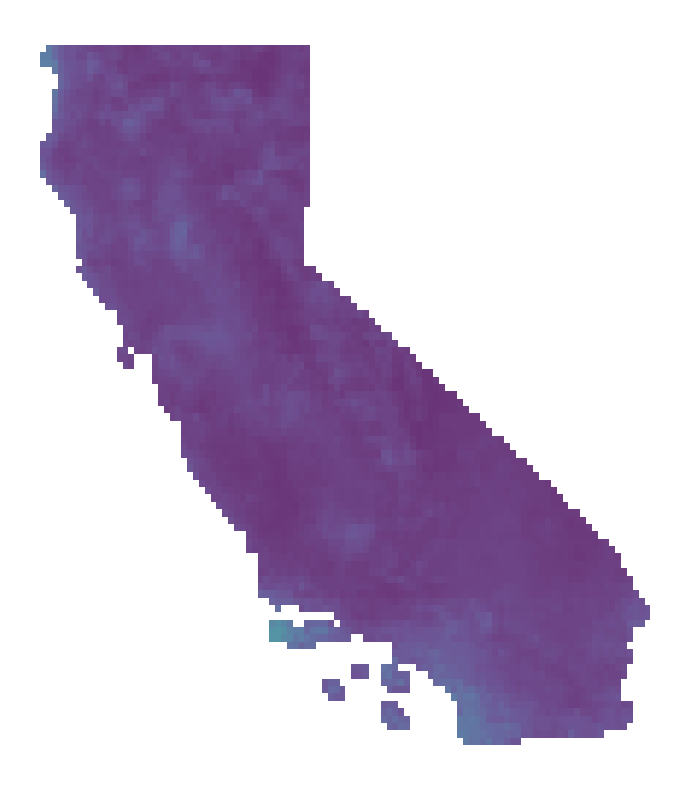

In [8]:
# Create Plots
for d in dt:
    for c in ['rain']: #,'cnt','frp/cnt']
        # Plot ca cells
        ax = rain_gdf_dict[d].plot(figsize=(11,10), column=c, cmap=viridis, alpha=0.8,
                                 markersize=1, vmin=0, vmax=300, zorder=3)
        ax.axis('off')
        ca = ca_shape.to_crs(crs=4326).plot(ax=ax, color='#333', zorder=2) # Plot state boundary
        bbox = ca_bbox.to_crs(crs=4326).plot(ax=ax, color='#fff', zorder=1) # Plot bounding box
        plt.colorbar(cm.ScalarMappable(cmap=viridis2), ax=ax, 
                     location='right', anchor=(0, 0.3), shrink=0.5) # Configure colorbar
        v = rain_gdf_dict[d][c]
        plt.title(f'{d}: min={v.min():.{2}f} median={np.median(v):.{1}f} max={v.max():.{0}f}', loc='left')
        plt.savefig(f'../outputs/nasa-gesdisc/{c}_{d}.png')
        plt.close()

In [ ]:
df1 = pd.DataFrame(columns=dt)
for d in dt:
    df1[d] = rain_gdf_dict[d]['rain']

In [ ]:
boxprops = dict(linestyle='-', linewidth=0.5, color='#999', facecolor="#eee")
flierprops = dict(marker='o', markerfacecolor='#999', markersize=3, markeredgecolor='none', alpha=0.4)
medianprops = dict(linestyle='-', linewidth=2.5, color='green')
meanprops = dict(marker='D', markeredgecolor='none',markerfacecolor='#ffa425')
capprops = dict(color="#666", linewidth = 2.5)

In [ ]:
df1.T.plot.bar(ylabel='precipitation mm/mo', 
            figsize=(55,18), grid=False, stacked=True)
plt.title('Total Monthly Precipitation in 0.1° Grid')
plt.xticks(rotation='vertical')
plt.grid(axis='y',color='#eee')
# plt.yscale('log')
# plt.savefig(f'../outputs/nasa-gesdisc/boxplot_log.png')
plt.show()